In [2]:
library(estimatr)
library(ggplot2)
data <- read.csv('ps3_lobbying.csv')
set.seed(123456789)
head(data)

,caseid,supportgroup,treat,ally,female
,<int>,<int>,<chr>,<dbl>,<int>
1,36,0,control,0.3333333,0
2,64,0,control,0.3333333,0
3,56,0,control,0.3333333,0
4,96,0,control,0.0000000,0
5,101,0,control,0.0000000,0
6,82,0,control,0.0000000,1


Here is a quick reminder of what each column means:

- `caseid`: Number that identifies each legislator/district
- `supportgroup`: This is the *outcome*. It is a measure of whether the legislator agreed to list their name publicly as a "sponsor" of the bill.
- `treat`: This is the *treatment*. It has several possible values:
    - `"control"`: the office received no contact from the lobbyist
    - `"officelobby"`: the legislator was asked to meet to discuss the bill in their office
    - `"sociallobby"`: the legislator was asked to meet to discuss the bill at a social location (a restaurant or bar)
- `ally`: The authors thought that social lobbying might be especially effective among legislators who had supported the group's priorities in the past. To measure this, they asked the lobbyist: "In your opinion, how well does the phrase ‘ally of the interest group’ describe the legislator?" This is therefore the lobbyists' rating of whether the legislator is an ally of the interest group (values 0, 1/3, 2/3, and 1).
- `female` : legislator gender, 1 = legislator is female; 0 = not

Again, here is what `treat` looks like:

In [3]:
# Function to re-randomize, or "shuffle", the treatment variable
re.randomize <- function(input.data) {
    input.data$treat <- sample(input.data$treat)
    return(input.data)
}

# Function to compute the effect of social lobbying
compute.social.lobby.effect <- function(input.data) {
    estimate <- difference_in_means(supportgroup ~ treat, input.data,
                                    condition1 = 'control', condition2 = 'sociallobby')$coefficients
    return(as.numeric(estimate))
}

actual.estimate <- compute.social.lobby.effect(data)
actual.estimate

[1] 0.1161746

In [4]:
head(data)

,caseid,supportgroup,treat,ally,female
,<int>,<int>,<chr>,<dbl>,<int>
1,36,0,control,0.3333333,0
2,64,0,control,0.3333333,0
3,56,0,control,0.3333333,0
4,96,0,control,0.0000000,0
5,101,0,control,0.0000000,0
6,82,0,control,0.0000000,1


In [5]:
head(re.randomize(data))

,caseid,supportgroup,treat,ally,female
,<int>,<int>,<chr>,<dbl>,<int>
1,36,0,sociallobby,0.3333333,0
2,64,0,officelobby,0.3333333,0
3,56,0,sociallobby,0.3333333,0
4,96,0,control,0.0000000,0
5,101,0,sociallobby,0.0000000,0
6,82,0,officelobby,0.0000000,1


In [6]:
head(re.randomize(data))

,caseid,supportgroup,treat,ally,female
,<int>,<int>,<chr>,<dbl>,<int>
1,36,0,officelobby,0.3333333,0
2,64,0,sociallobby,0.3333333,0
3,56,0,sociallobby,0.3333333,0
4,96,0,control,0.0000000,0
5,101,0,officelobby,0.0000000,0
6,82,0,sociallobby,0.0000000,1


In [7]:
compute.social.lobby.effect(re.randomize(data))
compute.social.lobby.effect(re.randomize(data))
compute.social.lobby.effect(re.randomize(data))

[1] 0.1181001

[1] -0.06033376

[1] 0.04107831

In [9]:
simulations.20000 <- replicate(20000, compute.social.lobby.effect(re.randomize(data)))

In [10]:
head(simulations.20000)

[1]  0.01861361 -0.01155327 -0.03594352 -0.01155327  0.01668806  0.04300385

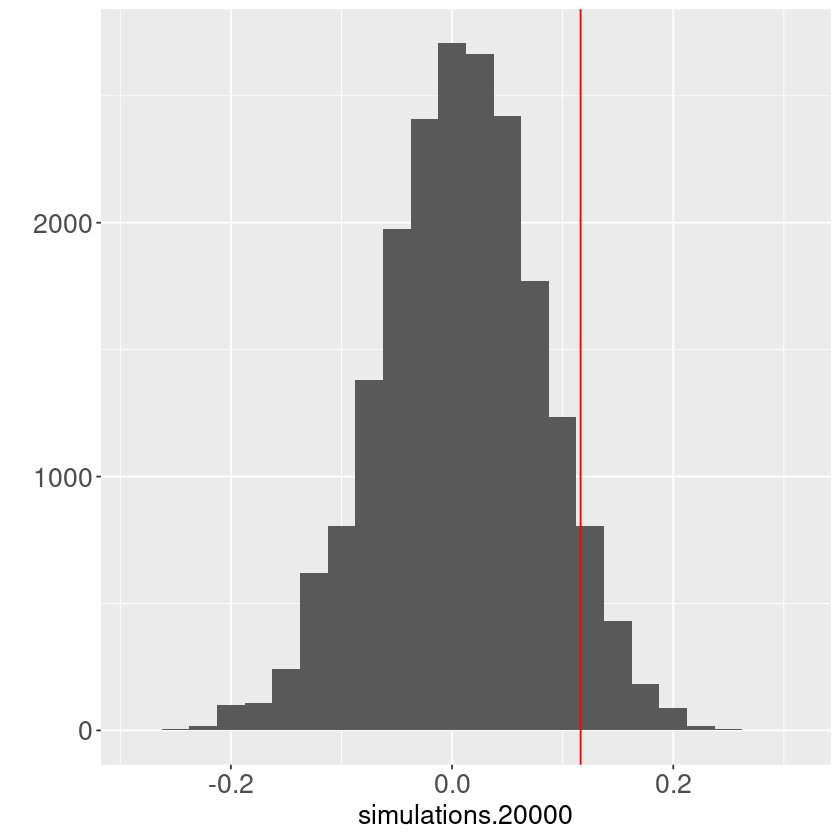

In [11]:
qplot(simulations.20000, binwidth = .025) + 
                             geom_vline(xintercept = actual.estimate, color = 'red') +
theme(axis.title.x = element_text(size = 16), 
      axis.text.x = element_text(size = 16), 
      axis.text.y = element_text(size = 16))

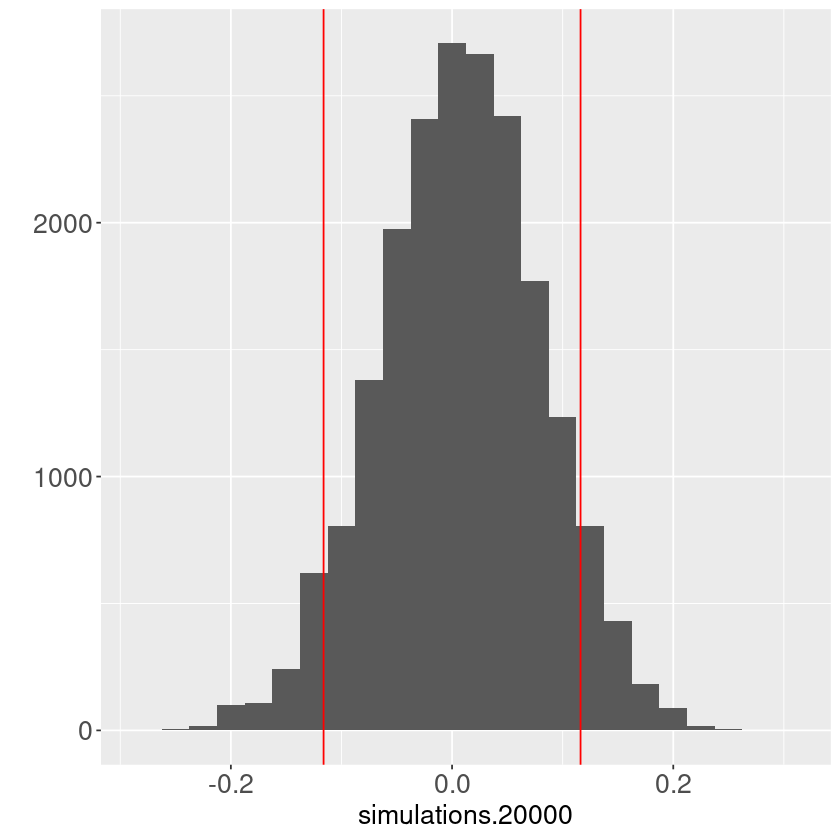

In [12]:
qplot(simulations.20000, binwidth = .025) + 
                             geom_vline(xintercept = actual.estimate, color = 'red') +
geom_vline(xintercept = -1*actual.estimate, color = "red") +
theme(axis.title.x = element_text(size = 16), 
      axis.text.x = element_text(size = 16), 
      axis.text.y = element_text(size = 16))

In [13]:
sum(ifelse(simulations.20000 >= actual.estimate, 1, 0))/20000

[1] 0.0749

In [17]:
sum(ifelse(simulations.20000 >= actual.estimate | 
           simulations.20000 <= -1*actual.estimate, 1, 0))/20000

[1] 0.12275

In [ ]:
# Write your code here

In [ ]:
# Write your code here

In [ ]:
# Write your code here